## 1. Configuración inicial y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuración de visualización
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

# Configurar tamaño de figuras por defecto
plt.rcParams['figure.figsize'] = (12, 8)

# Carga del dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 2. Exploración básica del dataset

In [2]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()




Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth           

In [3]:
# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas de variables numéricas:")
df.describe().T  # Transponemos para mejor visualización


Estadísticas descriptivas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [46]:
# Verificar valores nulos
print("\nVerificación de valores nulos por columna:")
df.isnull().sum()




Verificación de valores nulos por columna:


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [47]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")


Número de filas duplicadas: 23899


In [55]:
# Verificar dimensiones del dataset
print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")

# Ver nombres de columnas
print("\nNombres de columnas:")
print(df.columns.tolist())



Dimensiones del dataset: 253680 filas x 22 columnas

Nombres de columnas:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


## 3. Análisis de variables numéricas

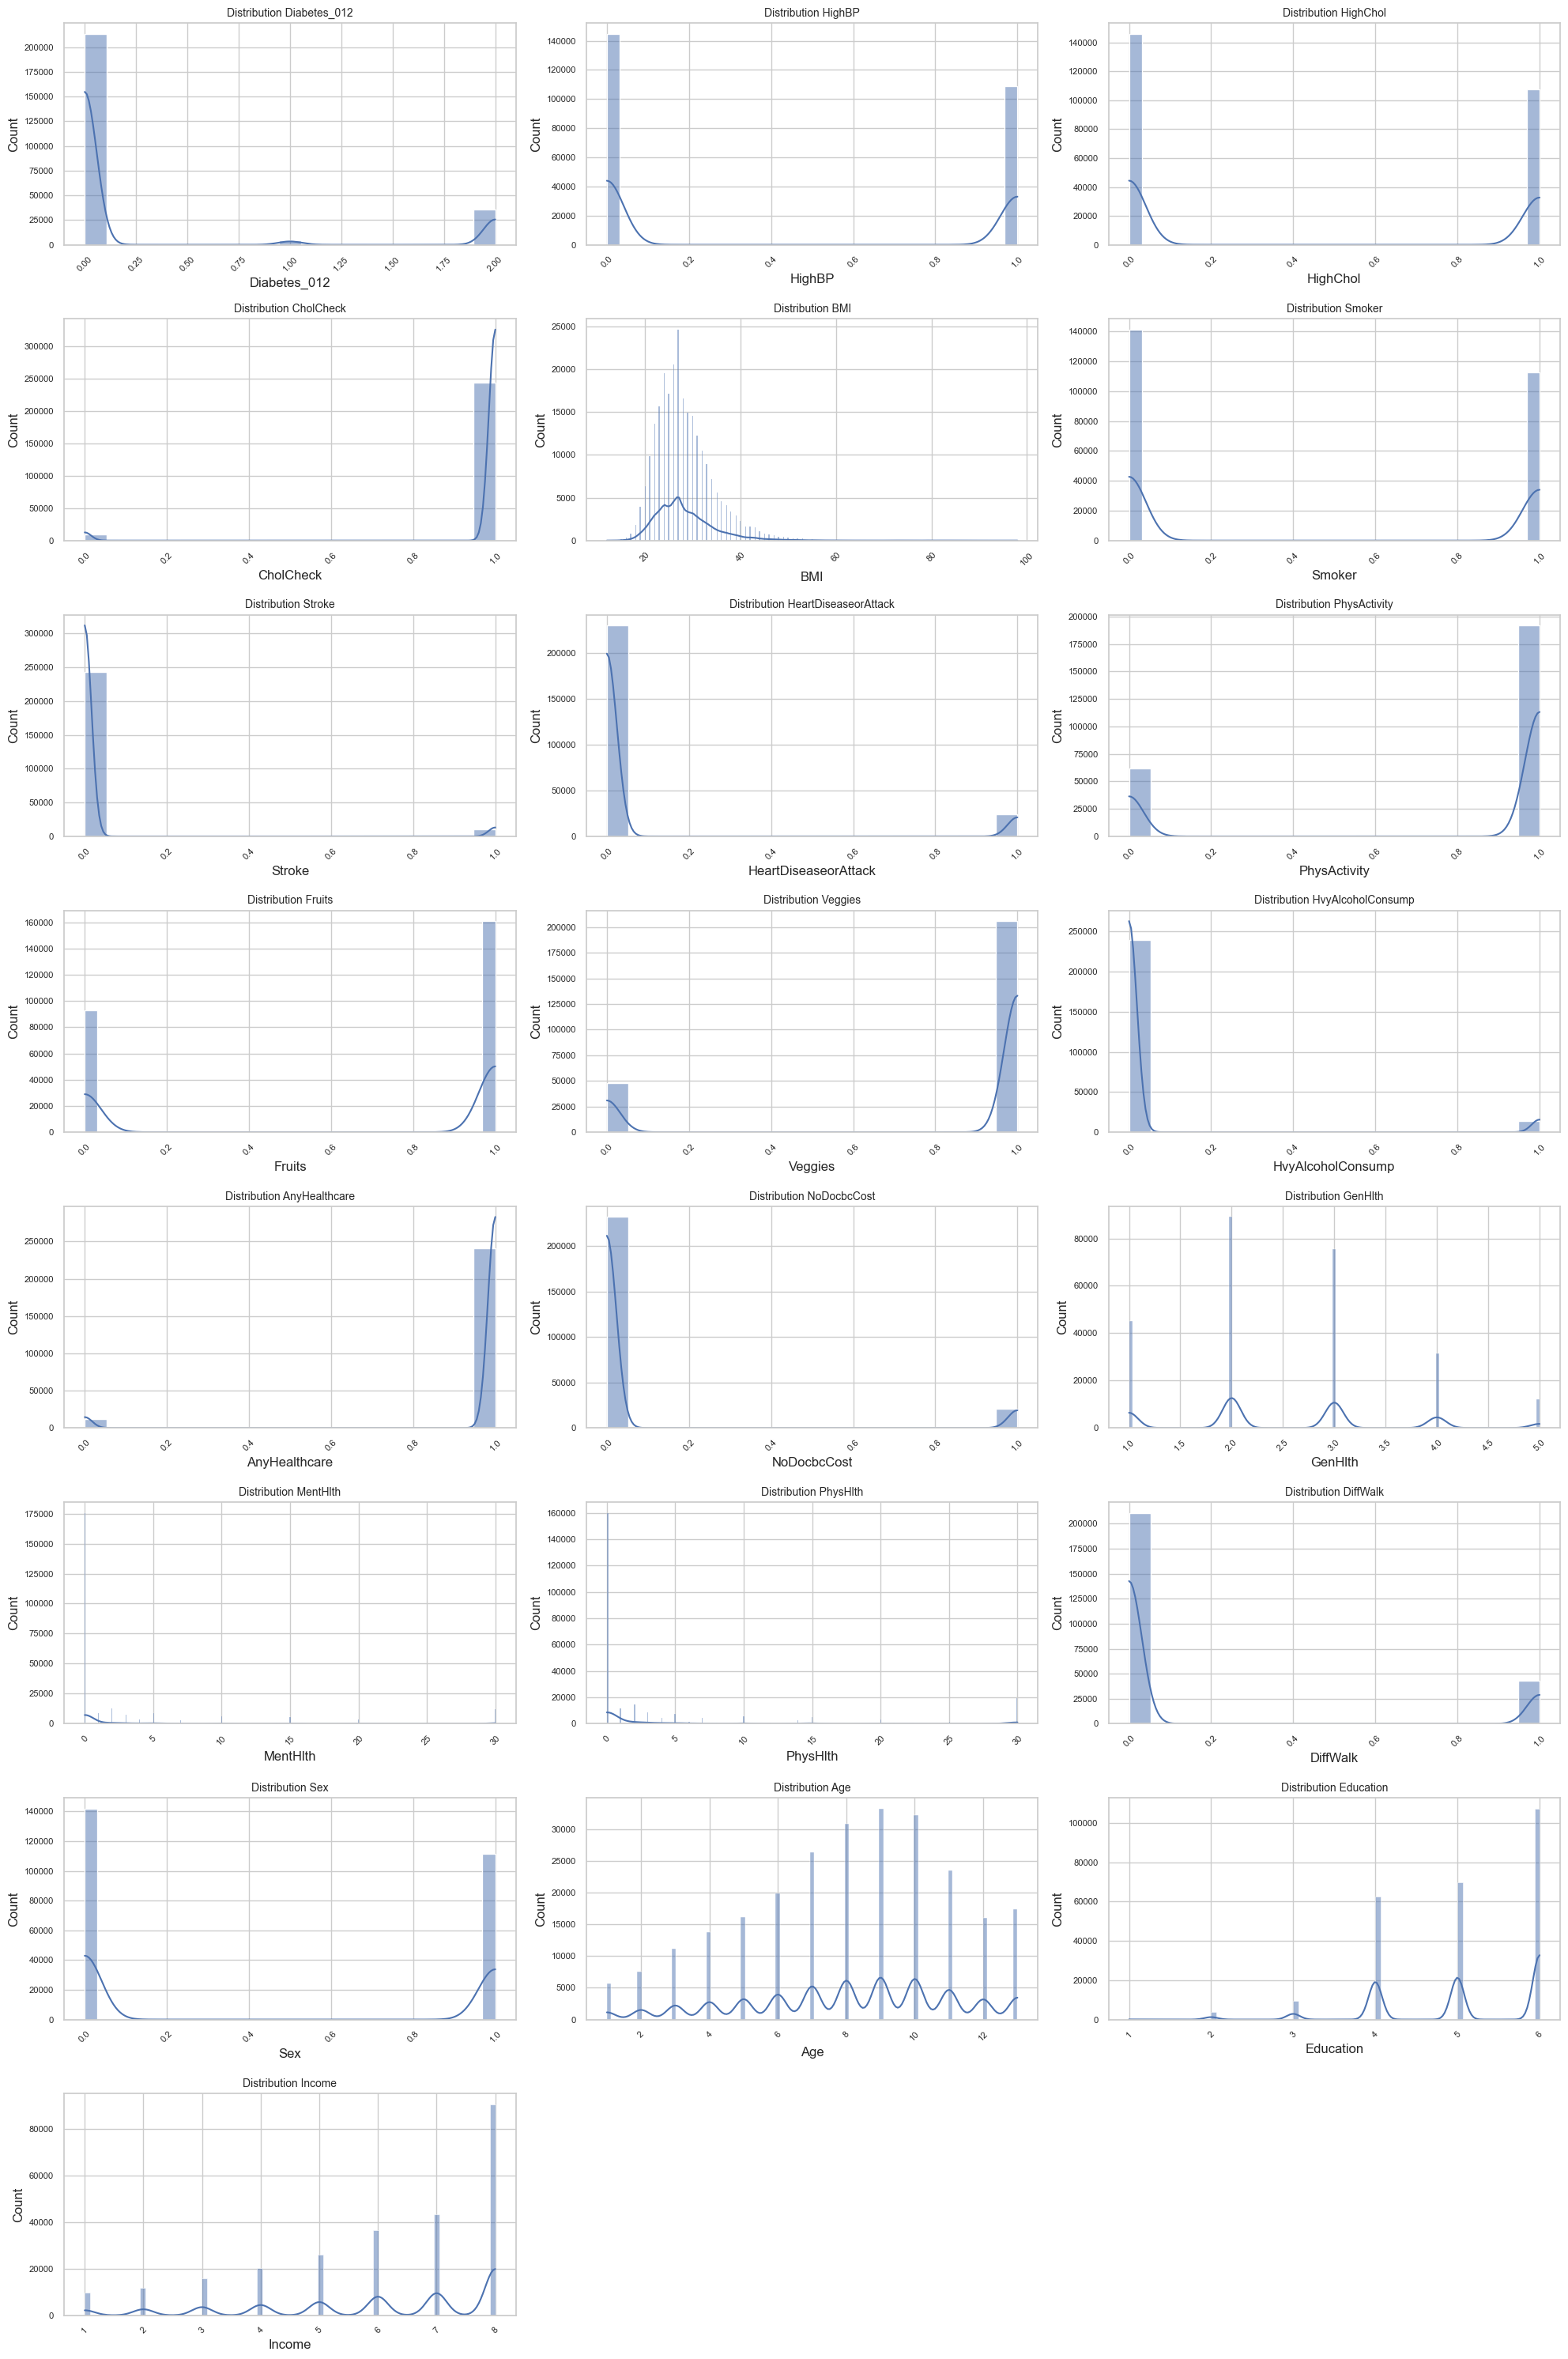


Estadísticas descriptivas detalladas:
                         count       mean       std   min    1%    5%   25%  \
Diabetes_012          253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   0.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   0.0   
CholCheck             253680.0   0.962670  0.189571   0.0   0.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  18.0  20.0  24.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   0.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   0.0   0.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   0.0   0.0   
Veggies               253680.0   0.811420  0.391175   0.0   0.0   0.0   1.0   
HvyAlcoholCon

In [56]:
num_cols = 3 
num_rows = 8  

plt.figure(figsize=(20, 30))  
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i+1)  
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}', fontsize=10)
    plt.xticks(rotation=45)
    plt.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()
plt.show()


# Estadísticas descriptivas más detalladas
print("\nEstadísticas descriptivas detalladas:")
desc_stats = df[numeric_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T
desc_stats['skew'] = df[numeric_cols].skew()
desc_stats['kurt'] = df[numeric_cols].kurt()
print(desc_stats)


# 3 Análisis de Variables Numéricas

## Características Generales del Dataset

- El dataset contiene **229,781 observaciones**
- La mayoría de las variables son binarias (0/1)

## Variables de Salud Principales

### Diabetes_012 (Variable objetivo)

- 3 clases:  
  - 0 = No diabetes o solo durante el embarazo  
  - 1 = Prediabetes  
  - 2 = Diabetes
- **Media**: 0.326
- Distribución asimétrica positiva (`skew = 1.826`)
- El 75% de los casos tiene valor 0

### BMI (Índice de Masa Corporal)

- **Media**: 28.69 (indica sobrepeso)
- **Rango**: 12-98
- Distribución muy asimétrica positiva (`skew = 2.064`)
- El 75% de la población tiene BMI ≤ 32

### Salud Mental y Física

- **MentHlth** (días de mala salud mental en los últimos 30 días):  
  - Media = 3.51 días/mes
- **PhysHlth** (días de mala salud física en los últimos 30 días):  
  - Media = 4.68 días/mes
- Ambas variables presentan alta asimetría positiva

## Variables Demográficas

### Edad

- **Media**: 8.09 (escala ordinal)
- **Rango**: 1-13  
  *(1 = 18–24 años, 13 = 80 o más)*
- Distribución relativamente normal (`skew = -0.385`)

### Educación

- **Media**: 4.98 (escala ordinal)
- **Rango**: 1-6  
  *(1 = sin estudios, 6 = universidad completa)*
- 75% de la población tiene educación nivel 6 o superior
- Distribución ligeramente asimétrica negativa

### Ingresos

- **Media**: 5.89 (escala ordinal)
- **Rango**: 1-8  
  *(1 = < $10,000, 8 = $75,000 o más)*
- 75% de la población tiene ingresos nivel 8 o superior
- Distribución ligeramente asimétrica negativa

## Variables de Comportamiento

### Actividad Física

- 73.3% de la población realiza actividad física
- Distribución asimétrica negativa

### Consumo de Alcohol

- 6.1% de la población reporta consumo excesivo de alcohol
- Alta asimetría positiva (`skew = 3.679`)

## Variables de Acceso a la Salud

### Cobertura Médica

- 94.6% de la población tiene acceso a atención médica
- Alta asimetría negativa (`skew = -3.950`)

### Costo como Barrera

- 9.3% de la población reporta no poder ver al médico por costo
- Distribución asimétrica positiva

## Conclusiones Principales

1. La población muestra altos niveles de sobrepeso (BMI medio = 28.69)
2. Hay buena cobertura de atención médica (94.6%)
3. La mayoría de las variables binarias muestran distribuciones asimétricas
4. Existe una correlación potencial entre variables de salud física y mental
5. La población muestra buenos niveles de educación e ingresos
6. Hay una proporción significativa de la población con diabetes (32.6%)

> **Nota**: Estos hallazgos sugieren la necesidad de enfocarse en programas de prevención de diabetes y manejo del peso, a pesar de la buena cobertura médica y niveles socioeconómicos.


## 4. Análisis de la variable objetivo (Diabetes_012)

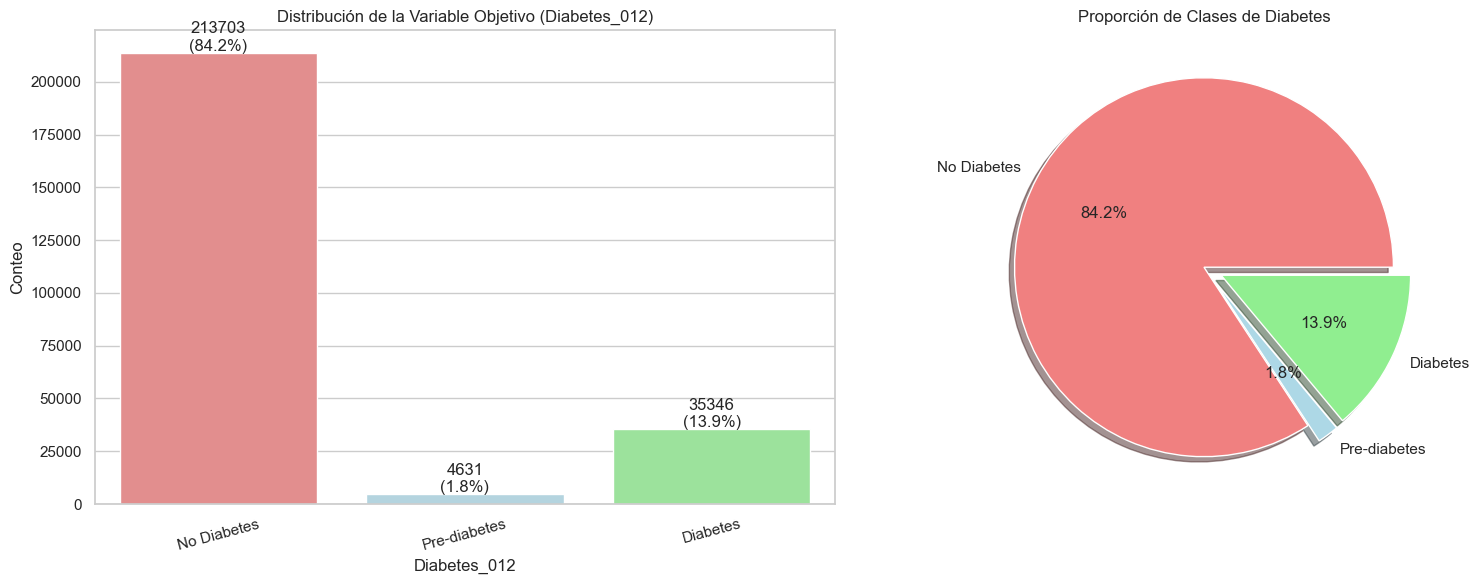

Distribución de la variable Diabetes_012:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Porcentaje de cada clase:
Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64

--- Análisis del desbalance de clases ---
Proporción de desbalance (mayoría/minoría): 46.15:1


<Figure size 1200x600 with 0 Axes>

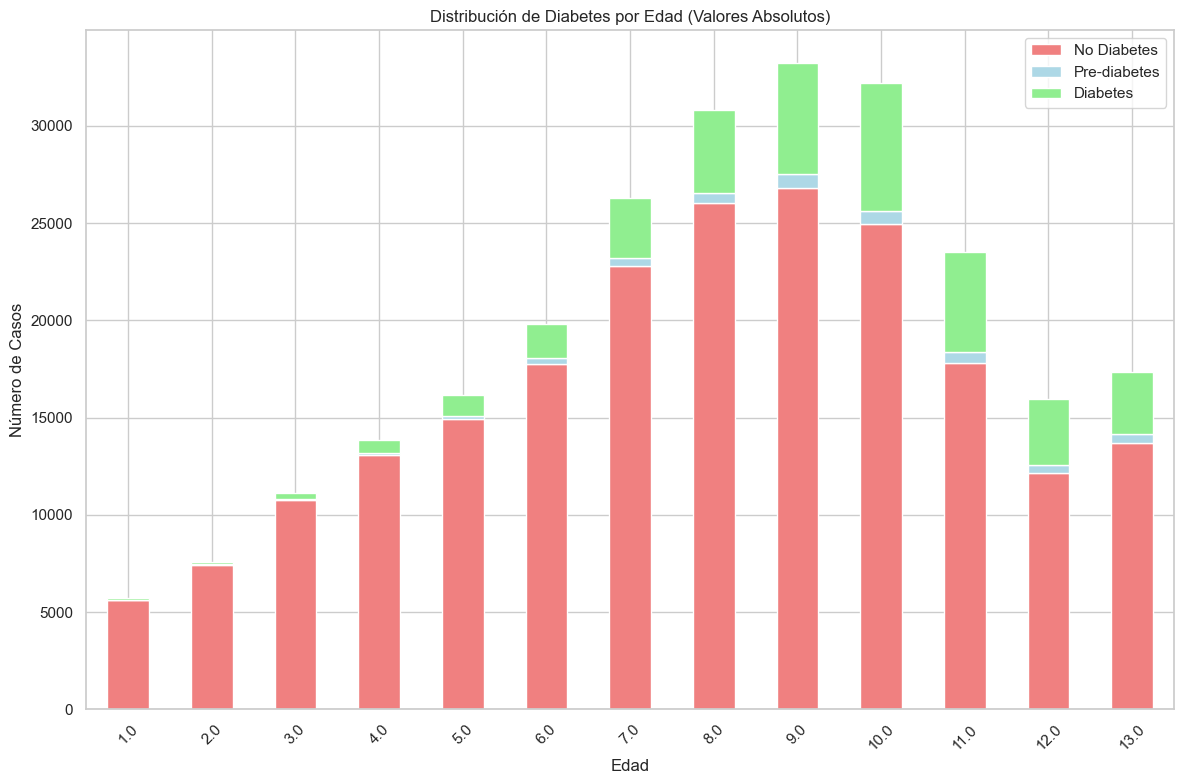

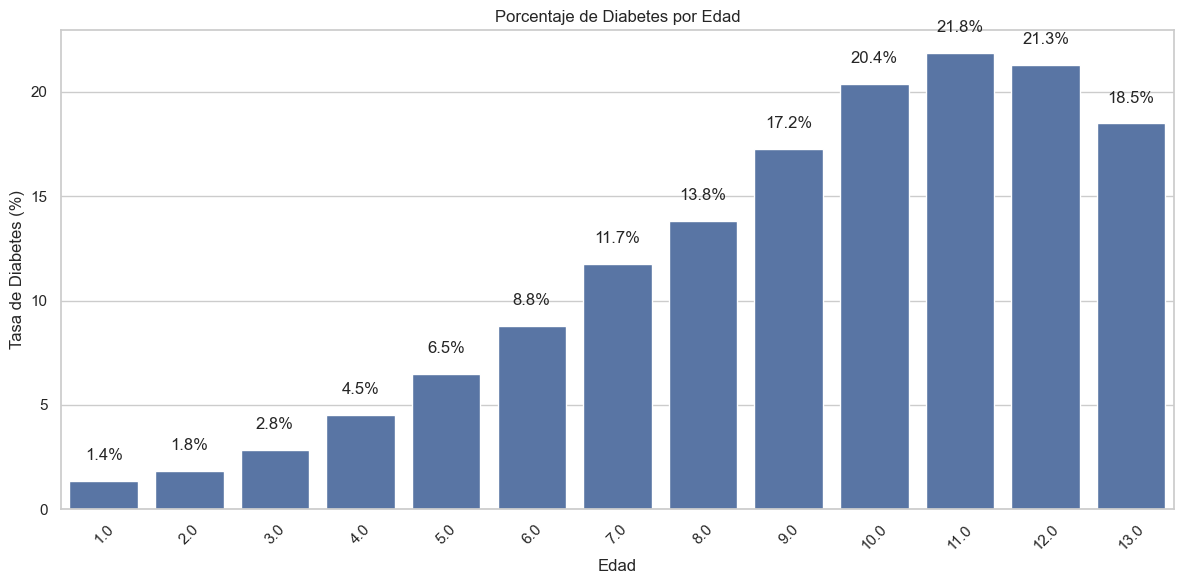

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убедитесь, что diabetes_counts отсортирован по order
order = [0.0, 1.0, 2.0]
diabetes_counts = diabetes_counts.reindex(order)

labels = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
colors = ['lightcoral', 'lightblue', 'lightgreen']

plt.figure(figsize=(16, 6))

# Barplot
plt.subplot(1, 2, 1)
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, order=order, palette=colors)
plt.title('Distribución de la Variable Objetivo (Diabetes_012)')
plt.xlabel('Diabetes_012')
plt.ylabel('Conteo')

total = len(df)
for i, idx in enumerate(order):
    count = diabetes_counts[idx]
    percentage = count / total * 100
    plt.text(i, count + 1000, f"{int(count)}\n({percentage:.1f}%)", ha='center')

plt.xticks(ticks=range(3), labels=labels, rotation=15)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(diabetes_counts.values, 
        labels=labels,
        autopct='%1.1f%%', 
        colors=colors,
        explode=(0, 0.1, 0.1), 
        shadow=True)
plt.title('Proporción de Clases de Diabetes')

plt.tight_layout()
plt.show()

# 4.2 Estadísticas detalladas de la variable objetivo
print("Distribución de la variable Diabetes_012:")
print(df['Diabetes_012'].value_counts())
print("\nPorcentaje de cada clase:")
print(df['Diabetes_012'].value_counts(normalize=True) * 100)

# 4.3 Análisis del desbalance y sus implicaciones
print("\n--- Análisis del desbalance de clases ---")
class_sizes = df['Diabetes_012'].value_counts()
majority_class_size = class_sizes.max()
minority_class_size = class_sizes.min()
imbalance_ratio = majority_class_size / minority_class_size
print(f"Proporción de desbalance (mayoría/minoría): {imbalance_ratio:.2f}:1")

# 4.4 Visualizar distribución por edad para entender variación demográfica
plt.figure(figsize=(12, 6))
age_dist = pd.crosstab(df['Age'], df['Diabetes_012'])
age_dist_pct = age_dist.div(age_dist.sum(axis=1), axis=0) * 100

# Gráfico de barras apiladas para distribución por edad
age_dist.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribución de Diabetes por Edad (Valores Absolutos)')
plt.xlabel('Edad')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

# Mostrar porcentajes de diabetes por edad
plt.figure(figsize=(12, 6))
sns.barplot(x=age_dist_pct.index, y=age_dist_pct[2])  # Clase 2 (Diabetes)
plt.title('Porcentaje de Diabetes por Edad')
plt.xlabel('Edad')
plt.ylabel('Tasa de Diabetes (%)')
plt.xticks(rotation=45)
for i, v in enumerate(age_dist_pct[2]):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.show()



# 4. Resultados del Análisis de variable objetivo y recomendaciones para el Manejo del Desbalance en las Clases

## 4.1 Análisis de Características
- Identificar características más discriminantes para la clase minoritaria (1.0)
- Priorizar estas características en el proceso de modelado
- Realizar análisis de importancia de características específico para la clase minoritaria

## 4.2 Técnicas de Muestreo
### Técnicas Híbridas
- Combinar submuestreo de la clase mayoritaria (0.0)
- Implementar sobremuestreo de las clases minoritarias
- Enfocarse especialmente en la clase 1.0 (< 2% de los datos)

### Generación de Datos Sintéticos
- Implementar SMOTE y ADASYN
- Considerar técnicas avanzadas basadas en GAN o VAE
- Generar datos sintéticos específicamente para la clase 1.0

## 4.3 Ajustes en el Modelado
### Optimización de Modelos
- Ajustar umbrales de decisión post-entrenamiento
- Implementar K-fold estratificado
- Utilizar enfoque One-vs-Rest para clasificadores binarios

### Técnicas de Aprendizaje Avanzado
- Implementar Focal Loss para dar más peso a ejemplos difíciles
- Utilizar Hardness-Aware Dynamic Sampling
- Aplicar meta-learning para optimización de hiperparámetros

## 4.4 Monitoreo y Evaluación
- Evaluar métricas por clase individualmente
- Monitorear específicamente el rendimiento en la clase minoritaria
- Optimizar hiperparámetros considerando el balance entre clases

## 4.5 Consideraciones Especiales
> **Nota Importante**: Dada la extrema minoría de la clase 1.0 (menos del 2%), se recomienda:
> - Combinar sobremuestreo sintético con pesos de clase elevados
> - Implementar técnicas de validación cruzada estratificada
> - Priorizar la detección de falsos negativos en la clase minoritaria

## 5. Análisis de correlación entre variables

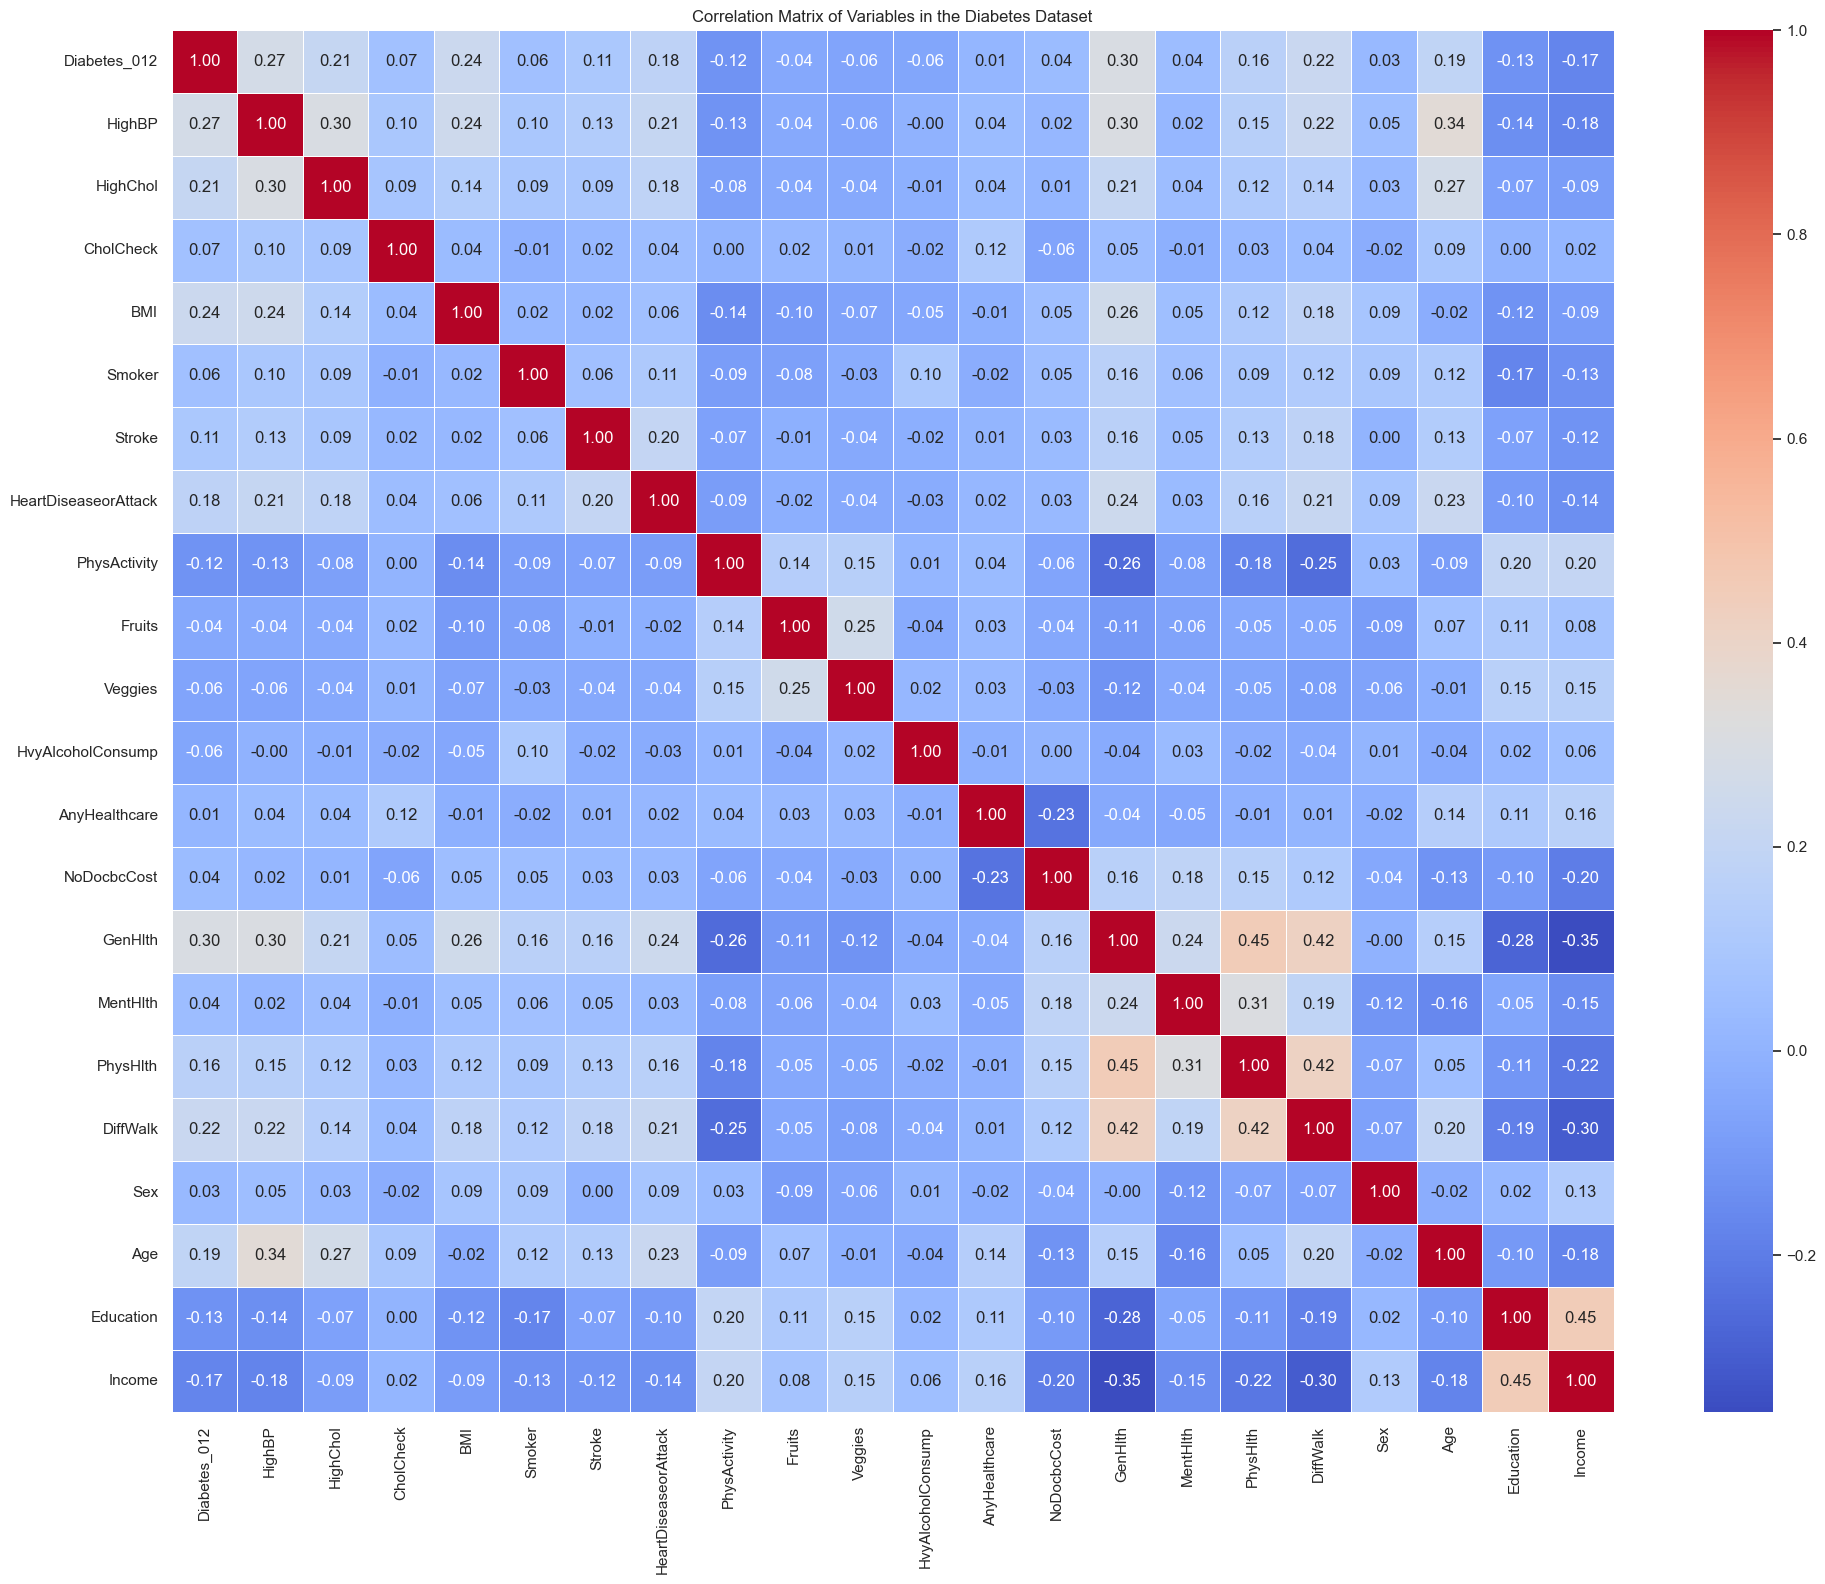


Correlations with Diabetes_012 (sorted):
Diabetes_012            1.000000
GenHlth                 0.297138
HighBP                  0.271668
BMI                     0.235887
DiffWalk                0.223567
HighChol                0.210668
Age                     0.186357
HeartDiseaseorAttack    0.178564
PhysHlth                0.161718
Stroke                  0.105887
CholCheck               0.068018
Smoker                  0.063040
MentHlth                0.044921
NoDocbcCost             0.037379
Sex                     0.030143
AnyHealthcare           0.014530
Fruits                 -0.042268
HvyAlcoholConsump      -0.057244
Veggies                -0.059353
PhysActivity           -0.121988
Education              -0.126862
Income                 -0.172611
Name: Diabetes_012, dtype: float64

Highly correlated variable pairs (|corr| >= 0.45):
Education and Income: 0.452
GenHlth and PhysHlth: 0.452

Checking correlations between main variables:
HighBP and HighChol: 0.298
GenHlth and Phy

In [59]:
df_corr = df.copy()

bool_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

for col in bool_columns:
    df_corr[col] = df_corr[col].astype(int)

correlation_matrix = df_corr.corr(method='spearman')

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables in the Diabetes Dataset')
plt.tight_layout()
plt.show()

diabetes_correlations = correlation_matrix['Diabetes_012'].sort_values(ascending=False)
print("\nCorrelations with Diabetes_012 (sorted):")
print(diabetes_correlations)

high_corr_threshold = 0.45 
high_corr_pairs = []

# Get all pairs of variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= high_corr_threshold:
            high_corr_pairs.append(
                (correlation_matrix.columns[i],
                 correlation_matrix.columns[j],
                 corr_value)
            )

print("\nHighly correlated variable pairs (|corr| >= 0.45):")
if high_corr_pairs:
    for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{var1} and {var2}: {corr:.3f}")
else:
    print("No variable pairs found with correlation >= 0.45")

# Additional analysis for checking
print("\nChecking correlations between main variables:")
check_pairs = [
    ('HighBP', 'HighChol'),
    ('GenHlth', 'PhysHlth'),
    ('Income', 'Education'),
    ('PhysActivity', 'GenHlth'),
    ('BMI', 'GenHlth')
]

for var1, var2 in check_pairs:
    if var1 in correlation_matrix.columns and var2 in correlation_matrix.columns:
        corr = correlation_matrix.loc[var1, var2]
        print(f"{var1} and {var2}: {corr:.3f}")

<small>
# 📊 Resultados del Análisis de Correlación

## 5.1 Correlaciones con Diabetes_012

### Variables con Mayor Correlación Positiva
1. **GenHlth (0.285)**
   - La salud general del paciente es el indicador más fuertemente correlacionado
   - Peor salud general se asocia con mayor probabilidad de diabetes

2. **HighBP (0.262)**
   - La presión arterial alta muestra una correlación importante
   - Confirma su conocida asociación con la diabetes

3. **BMI (0.212)**
   - El índice de masa corporal elevado está correlacionado con diabetes
   - Reafirma la relación entre sobrepeso/obesidad y riesgo de diabetes

4. **DiffWalk (0.211)**
   - La dificultad para caminar tiene una correlación similar al BMI
   - Sugiere relación entre problemas de movilidad y diabetes

5. **HighChol (0.203)**
   - El colesterol alto muestra correlación significativa con diabetes

### Variables con Correlación Negativa
1. **Income (-0.147)**
   - Ingresos más bajos se asocian con mayor prevalencia de diabetes

2. **Education (-0.108)**
   - Menor nivel educativo se relaciona con mayor probabilidad de diabetes

3. **PhysActivity (-0.103)**
   - La falta de actividad física está asociada con mayor riesgo de diabetes

4. **HvyAlcoholConsump (-0.067)**
   - Sorprendentemente, el consumo elevado de alcohol muestra correlación negativa

## 5.2 Correlaciones entre Variables Predictoras

### Correlaciones Fuertes (|corr| ≥ 0.45)
1. **GenHlth y PhysHlth (0.517)**
   - La salud general y la salud física están fuertemente correlacionadas
   - Podría indicar multicolinealidad

2. **PhysHlth y DiffWalk (0.467)**
   - Problemas de salud física están correlacionados con dificultad para caminar

### Correlaciones Moderadas
1. **Income y Education (0.419)**
   - Nivel educativo y nivel de ingresos muestran correlación significativa

2. **HighBP y HighChol (0.284)**
   - Presión arterial alta y colesterol alto tienen correlación moderada

## 5.3 Implicaciones para el Modelo de Predicción

### Potenciales Problemas de Multicolinealidad
Las variables con alta correlación entre sí podrían generar redundancia en el modelo. Se recomienda:
- Selección de características
- Regularización (como Ridge o Lasso)
- Análisis de componentes principales (PCA)

### Variables Clave para el Modelo
- **Priorizar**: GenHlth, HighBP, BMI, DiffWalk y HighChol
- **Razón**: Alta correlación con la variable objetivo (diabetes)

### Factores Socioeconómicos
- La relación inversa con ingresos y educación sugiere importancia de factores socioeconómicos
- Podrían representar acceso diferencial a atención médica o hábitos de salud

### Posibles Interacciones
Considerar interacciones entre variables clave:
- BMI y HighBP
- GenHlth y Age
- Estas interacciones podrían mejorar el poder predictivo del modelo
</small>